In [1]:
from functools import reduce

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt 
import seaborn as sns

from polyfit import polyfit 
from regress import regress

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
data = pd.read_csv("./Data/data.csv")
data
print(data.columns)

Index(['Country', 'Region_x', 'Population (millions)', 'HDI', 'GDP per Capita',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint',
       'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required', 'Data Quality', 'Region_y',
       'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [3]:
footprints = ['Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint']

capacities = ['Cropland', 'Grazing Land', 'Forest Land', 
              'Urban Land', 'Fishing Water', 'Total Biocapacity']

# plot setup 
plt.style.use('seaborn')
style = dict(size=10, color='gray')
gdpColors = list(reversed(sns.color_palette("viridis",as_cmap=False,n_colors=6)))


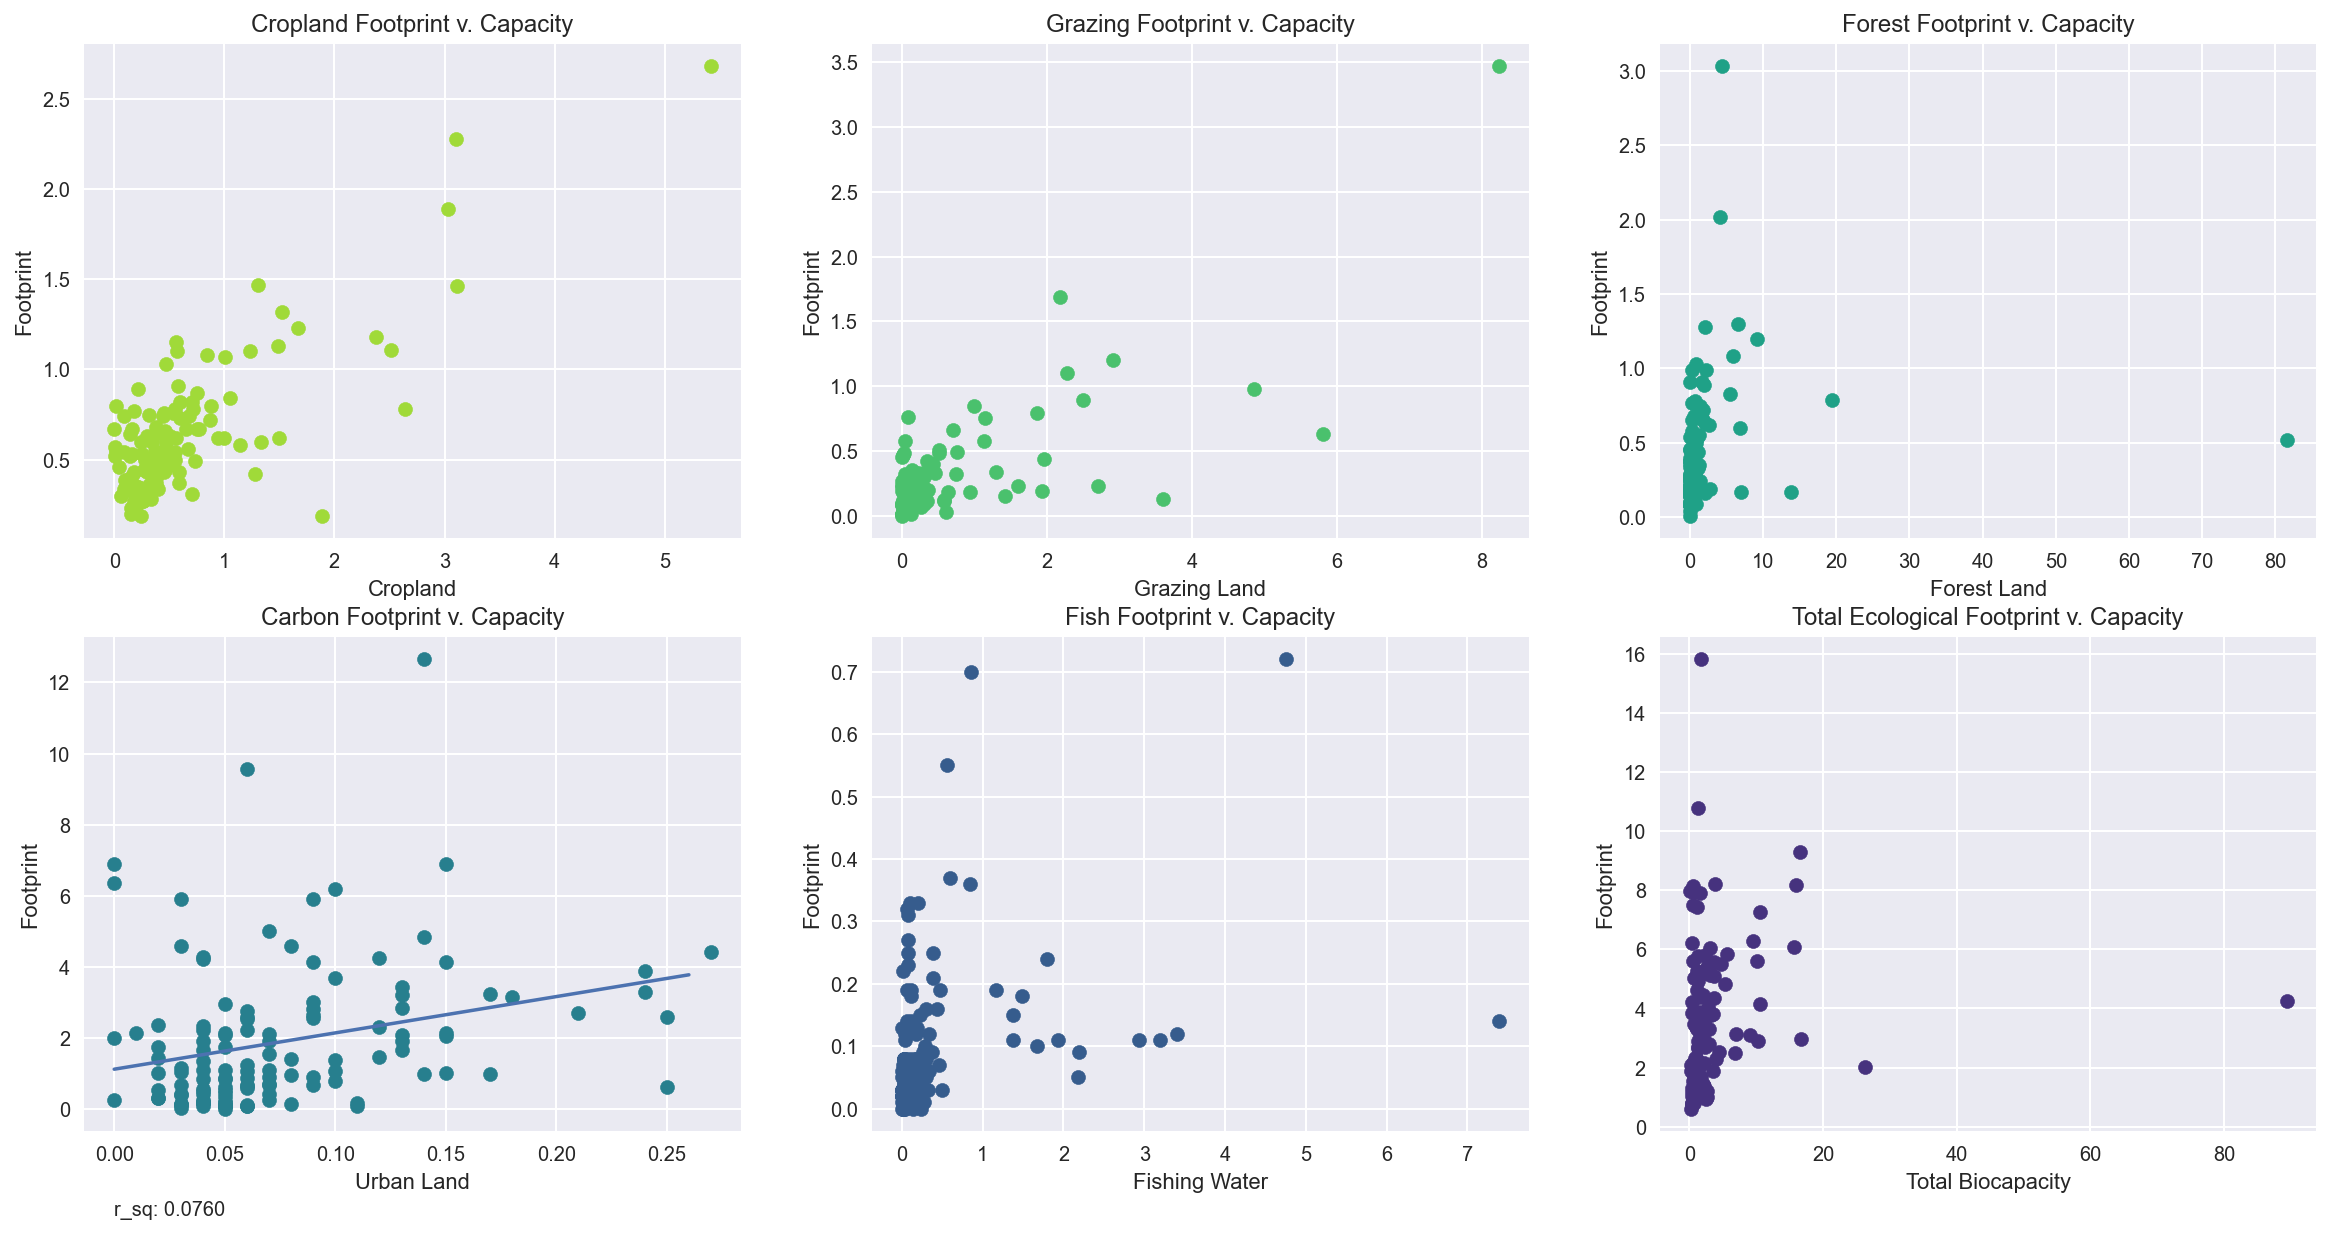

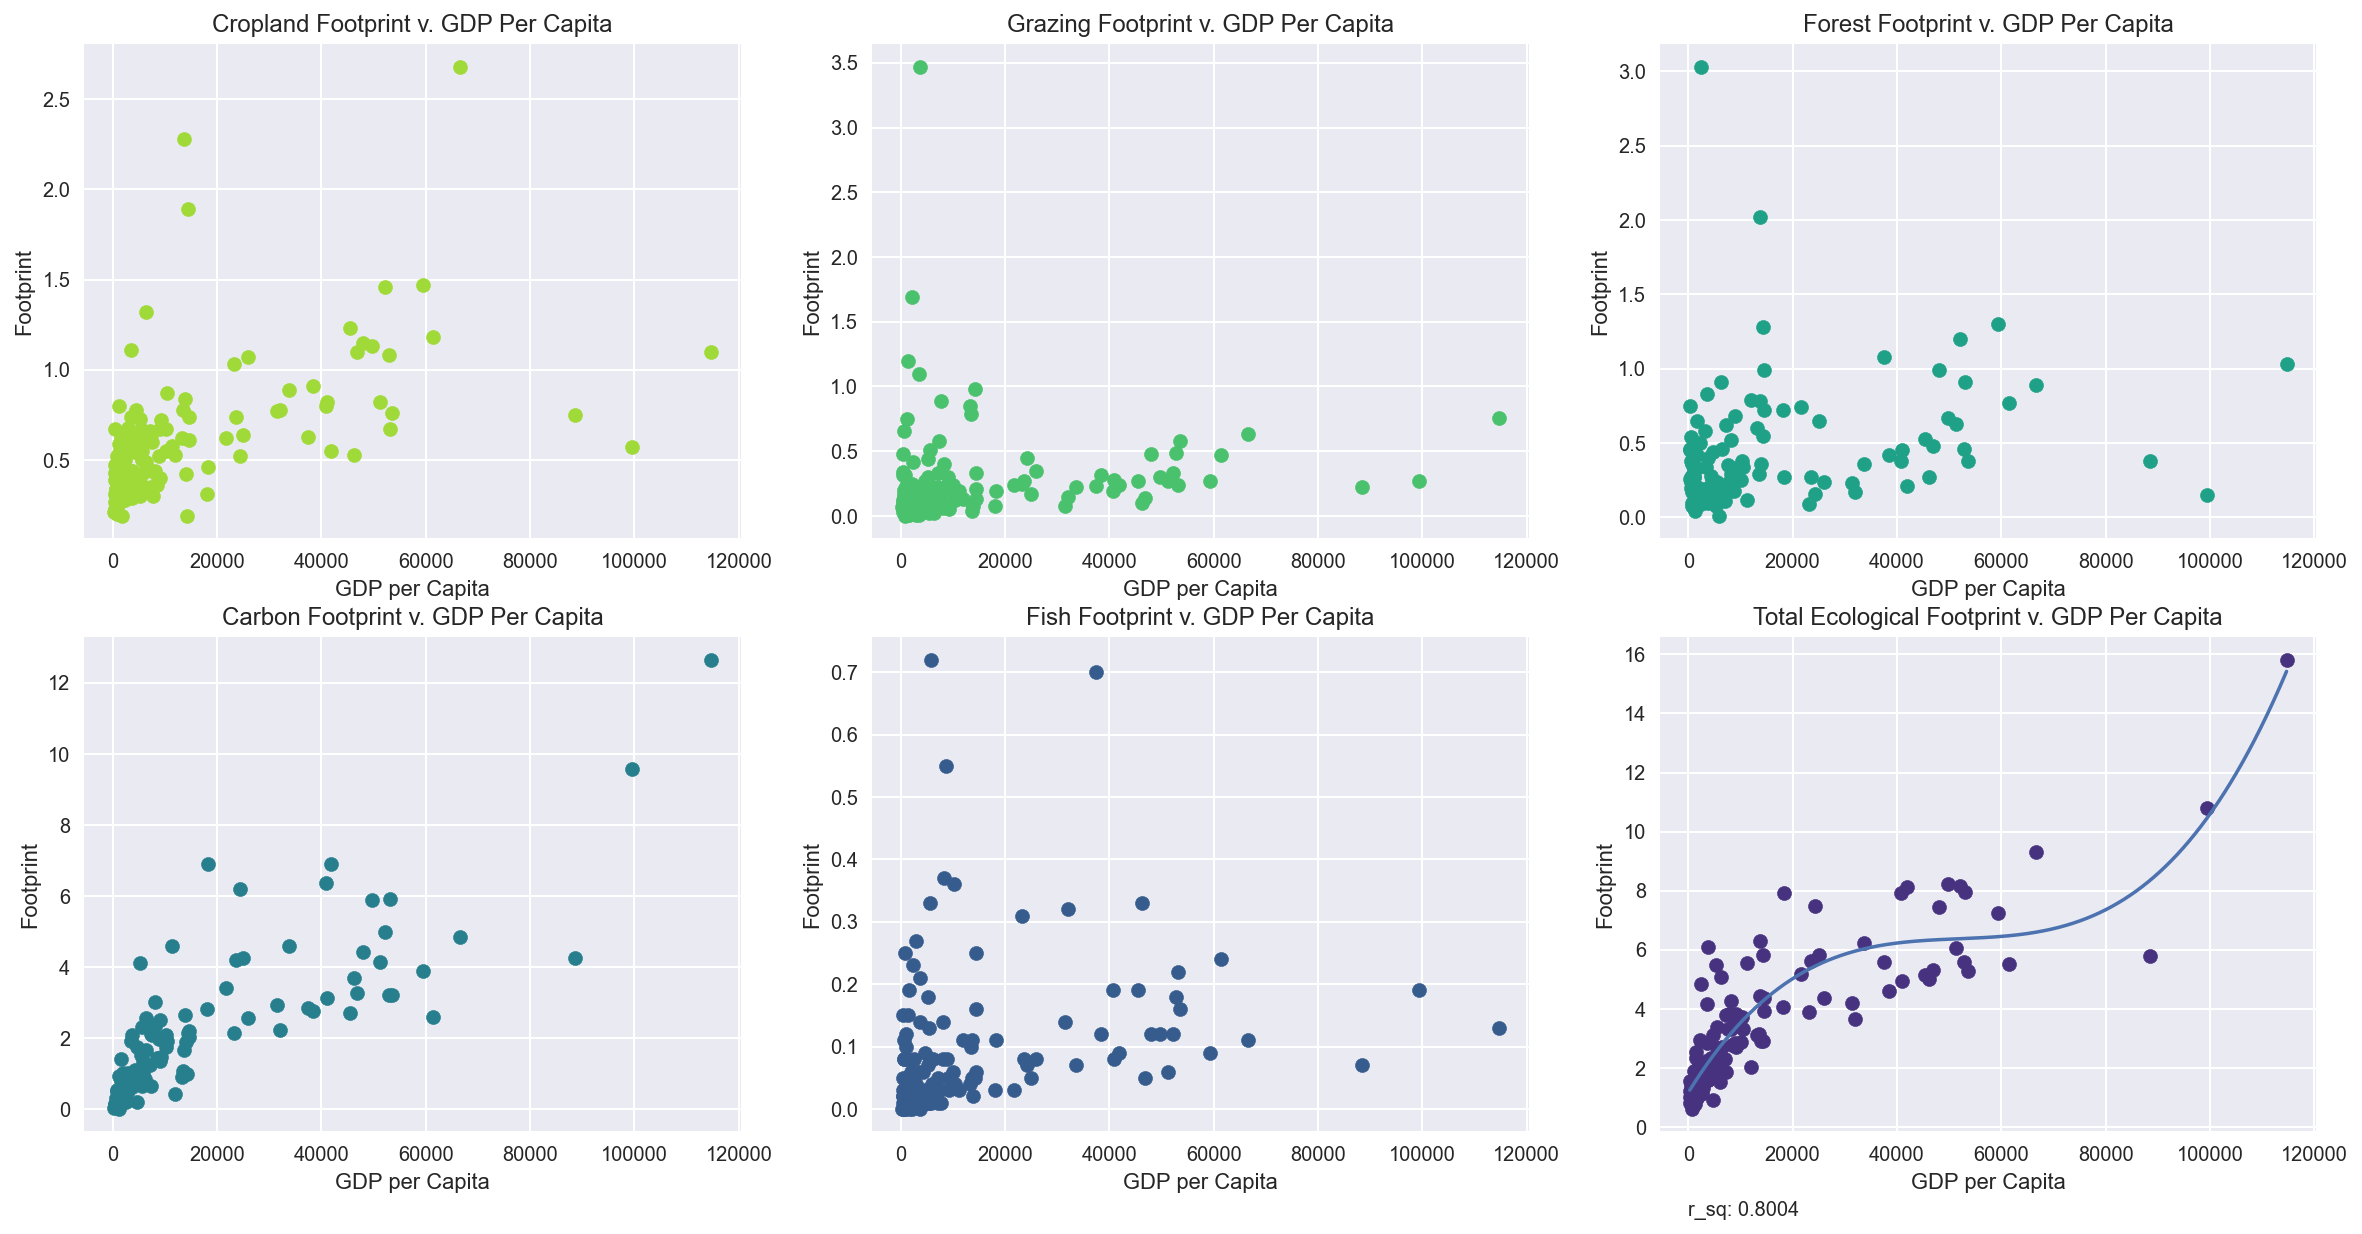

In [4]:
# Plots 1 & 2 [Footprints v. Cap & Footprints v. GDP]

plt.figure(figsize=(20, 10))
annotate = 4
for i,f in enumerate(footprints):
    plt.subplot(2,3,i+1)
    plt.title(f + ' v. Capacity')
    plt.scatter(data[capacities[i]], (data[f]), marker='o', color=gdpColors[i])
    plt.xlabel(capacities[i])
    plt.ylabel('Footprint')
    if (annotate == i+1):
        [txt,p,x,y] = regress(data[capacities[i]],data[f],1)
        plt.text(0,-3,txt)
        plt.plot(x,y)
plt.show()


plt.figure(figsize=(20, 10))
annotate = 6
for i,f in enumerate(footprints):
    plt.subplot(2,3,i+1)
    plt.title(f + ' v. GDP Per Capita')
    plt.scatter(data['GDP per Capita'], (data[f]), marker='o', color=gdpColors[i])
    plt.xlabel('GDP per Capita')
    plt.ylabel('Footprint')
    if (annotate == i+1):
        [txt,p,x,y] = regress(data['GDP per Capita'],data[f],3)
        plt.text(0,-3,txt)
        plt.plot(x,y)
plt.show()

[(0.626579, 0.854645, 0.223353), (0.288921, 0.758394, 0.428426), (0.122312, 0.633153, 0.530398), (0.153364, 0.497, 0.557724), (0.212395, 0.359683, 0.55171), (0.275191, 0.194905, 0.496005)]


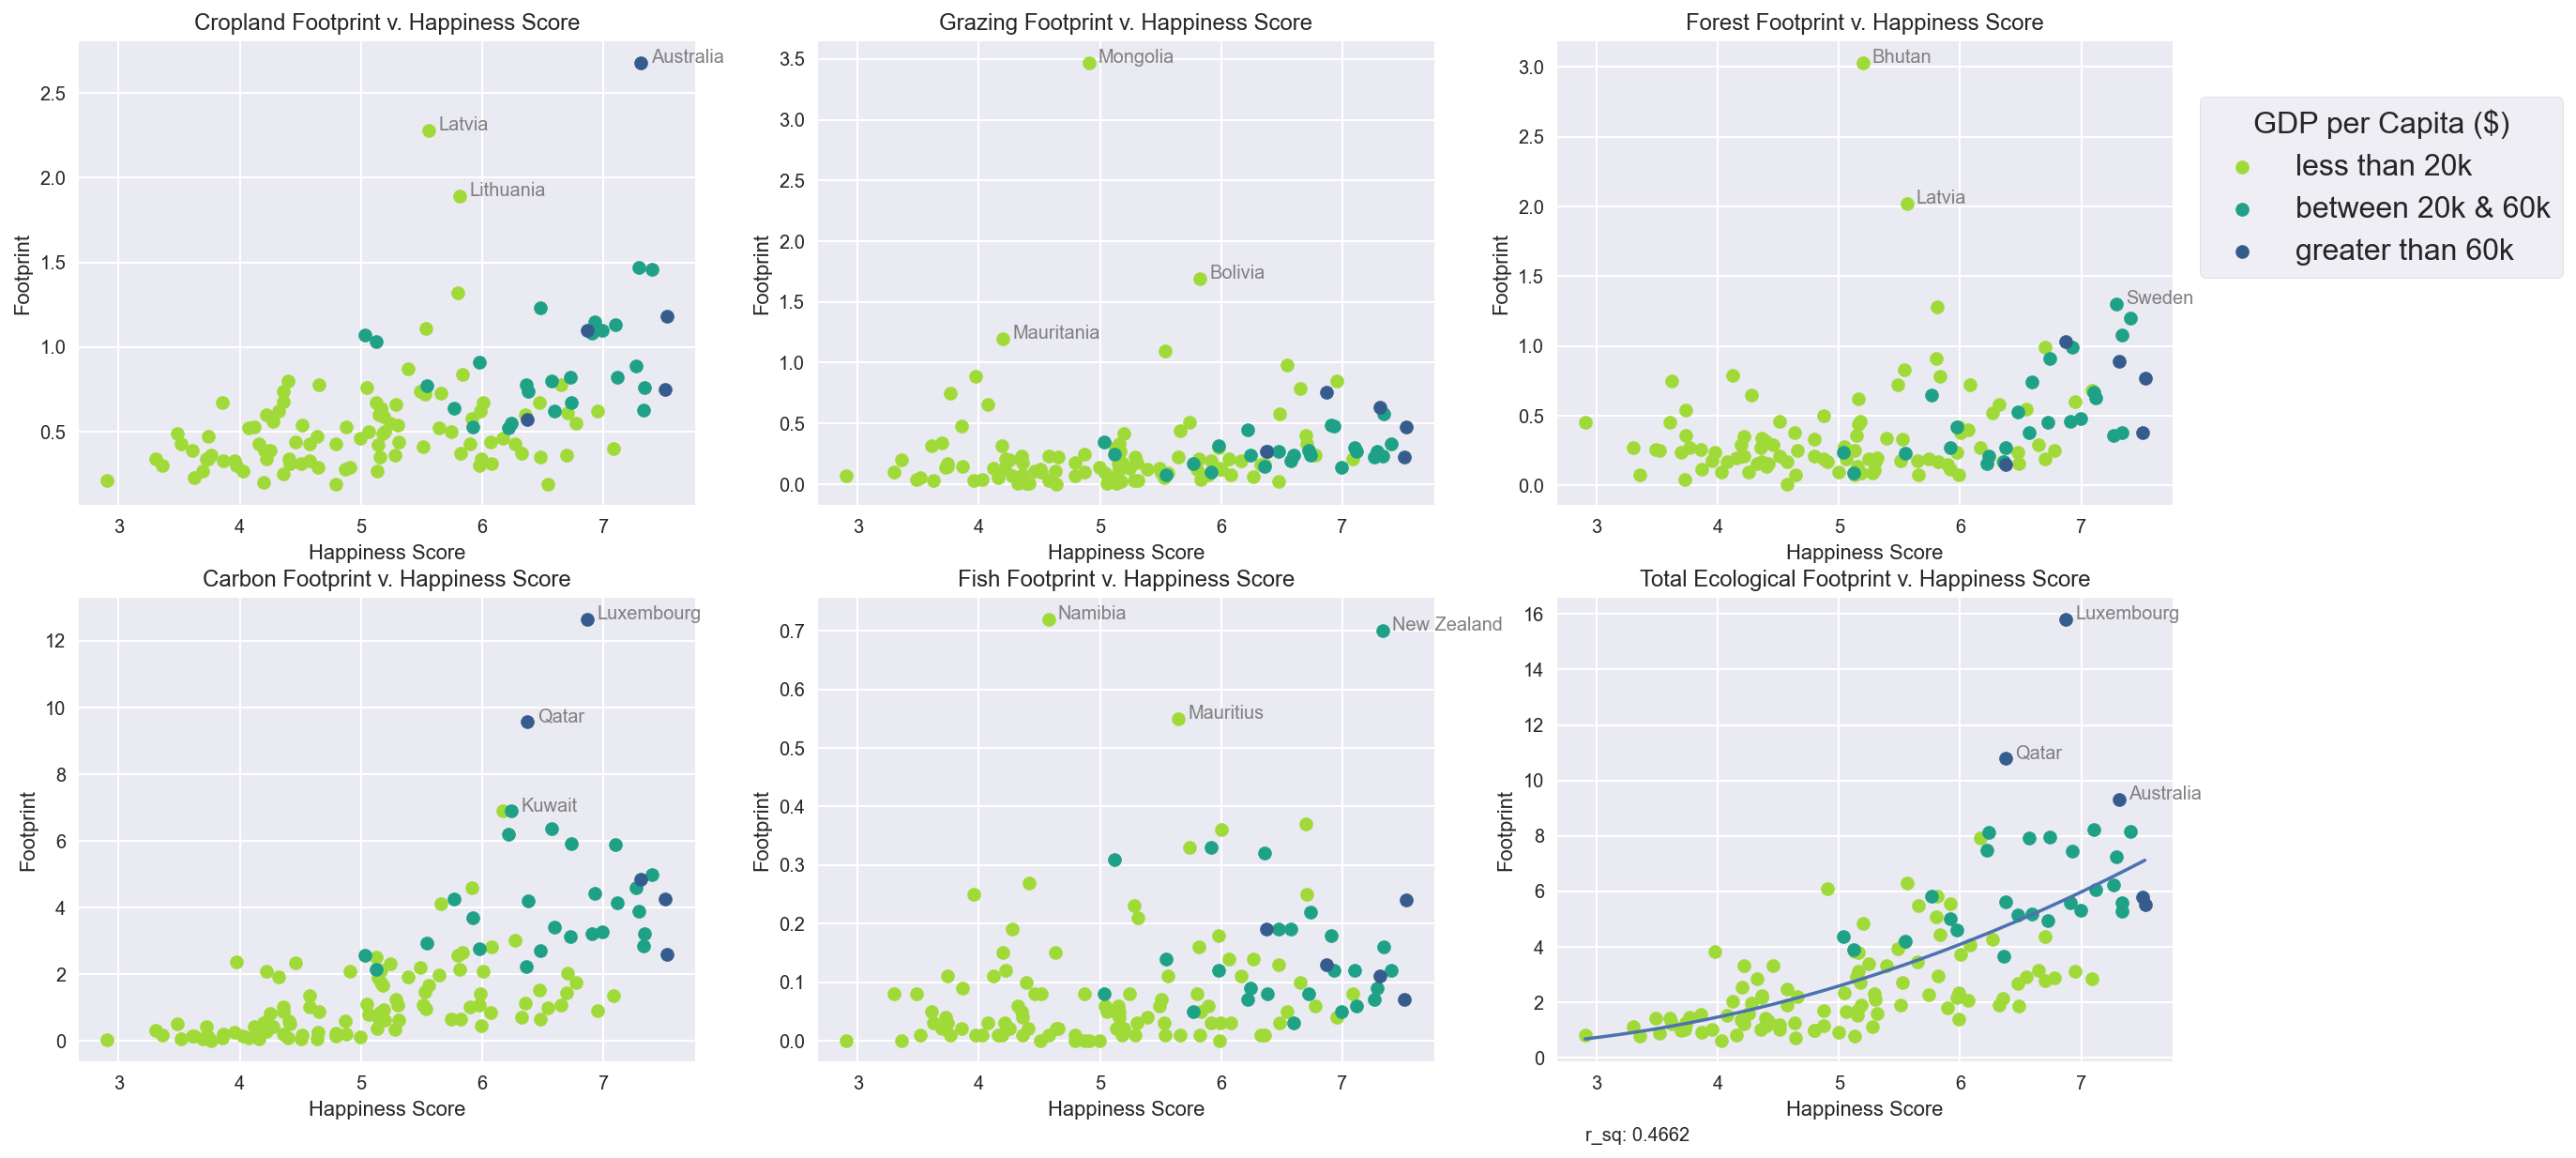

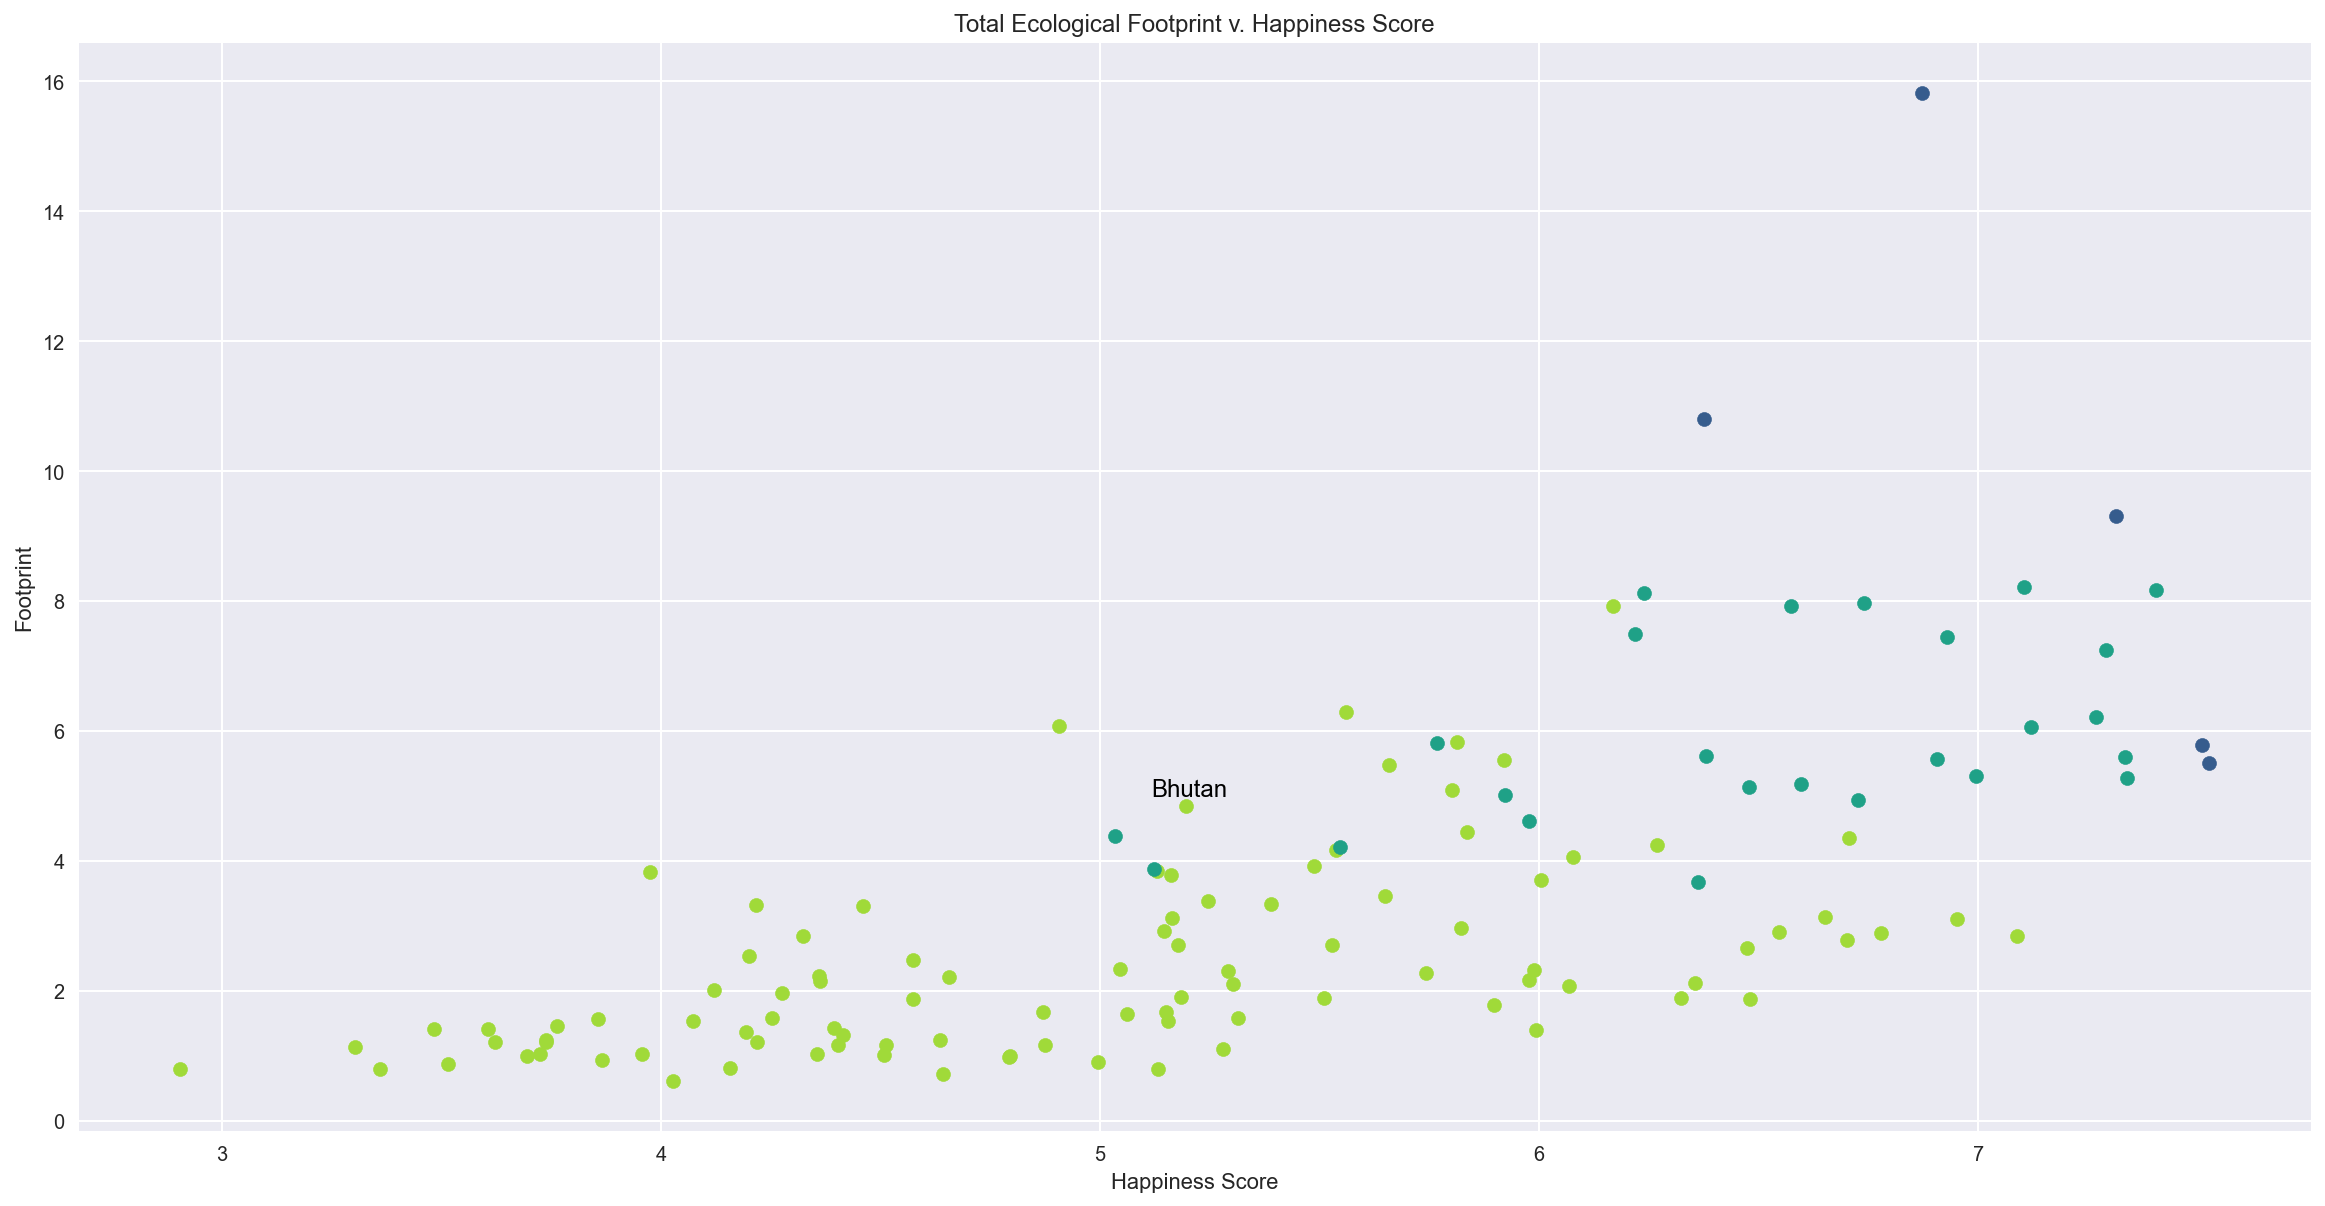

In [5]:
# Plots 3 & 4 [Footprints v. Happiness & Bhutan]

low = data[data['GDP per Capita']<=20000]
med = data[(data['GDP per Capita']>20000) & (data['GDP per Capita']<=60000)]
hi = data[(data['GDP per Capita']>60000)]
top = 3
offset = 0.08

fig,axs = plt.subplots(2,3,figsize=(20, 10))
axs = axs.ravel()
annotate = 6
print(gdpColors)
for i,f in enumerate(footprints):
    max2s = sorted(data[f], reverse=True)[:top]
    idxs = [data.index[data[f]==ymax] for ymax in max2s]
    max1s = [data['Happiness Score'][idx].values[0] for idx in idxs]
    for k in range(len(max1s)):
        axs[i].text(max1s[k]+offset,max2s[k],data['Country'][idxs[k]].values[0], **style)
    for j,datas in enumerate([low,med,hi]):
        axs[i].set_title(f + ' v. Happiness Score')
        axs[i].scatter(datas['Happiness Score'],(datas[f]), marker='o', color=gdpColors[j*2])
        axs[i].set_xlabel('Happiness Score')
        axs[i].set_ylabel('Footprint')
    if annotate == i+1:
        [txt,p,x,y] = regress(data['Happiness Score'].values,data[f].values,2)
        axs[i].plot(x,y)
        axs[i].text(min(data['Happiness Score']),-3,txt)
fig.legend(['less than 20k','between 20k & 60k','greater than 60k'],bbox_to_anchor=(1.05,.85),title='GDP per Capita ($)',title_fontsize=16,fontsize=16,frameon=True)
plt.show() 


bhutanidx = data.index[data['Country']=='Bhutan']
bhutany = data['Total Ecological Footprint'][bhutanidx].values[0]
bhutanx = data['Happiness Score'][bhutanidx].values[0]

plt.figure(figsize=(20, 10))
style = dict(size=12, color='black')
for j,datas in enumerate([low,med,hi]):
    plt.scatter(datas['Happiness Score'],(datas['Total Ecological Footprint']), marker='o', color=gdpColors[j*2])
plt.title('Total Ecological Footprint v. Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Footprint')
plt.text(bhutanx-offset,bhutany+2*offset,'Bhutan', **style)
plt.show()